In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import os, gc

import warnings; warnings.filterwarnings('ignore')

In [2]:
file_name = '0EA27ICBLF_1607.txt' # an arbitrary file to explore


In [3]:
df = pd.read_csv(
    'C:/Users/ivanr/Documents/Erdos_bootcamp/Group project/Archived-Data/Tappy Data/' + file_name,
    delimiter = '\t',
    names = ['UserKey', 'Date', 'Timestamp', 'Hand', 'Hold_time', 'Direction', 'Latency_time', 'Flight_time'],
index_col=False)

df = df.drop('UserKey', axis=1)

In [4]:
    # cleaning data in Hand
    df = df[
        (df['Hand'] == 'L') |
        (df['Hand'] == 'R') |
        (df['Hand'] == 'S')
    ]

    # cleaning data in Direction
    df = df[
        (df['Direction'] == 'LL') |
        (df['Direction'] == 'LR') |
        (df['Direction'] == 'LS') |
        (df['Direction'] == 'RL') |
        (df['Direction'] == 'RR') |
        (df['Direction'] == 'RS') |
        (df['Direction'] == 'SL') |
        (df['Direction'] == 'SR') |
        (df['Direction'] == 'SS')
    ]

In [5]:
df

,Date,Timestamp,Hand,Hold_time,Direction,Latency_time,Flight_time
0,160722,18:41:04.336,L,0101.6,LL,0234.4,0156.3
1,160722,18:42:14.070,L,0085.9,LL,0437.5,0359.4
2,160722,18:42:14.273,L,0078.1,LL,0210.9,0125.0
3,160722,18:42:14.617,L,0062.5,LL,0359.4,0281.3
4,160722,18:42:15.586,S,0125.0,LS,0187.5,0093.8
...,...,...,...,...,...,...,...
142630,160731,22:27:58.781,L,93.8,LL,218.8,0125.0
142631,160731,22:47:25.383,S,132.8,RS,406.3,0257.8
142632,160731,22:50:02.586,L,140.6,LL,351.6,0218.8
142633,160731,22:50:02.867,L,125,LL,296.9,0156.3


In [6]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce', format='%y%m%d')
df = df.dropna(axis=0)


In [7]:
df.Date

0        2016-07-22
1        2016-07-22
2        2016-07-22
3        2016-07-22
4        2016-07-22
            ...    
142630   2016-07-31
142631   2016-07-31
142632   2016-07-31
142633   2016-07-31
142634   2016-07-31
Name: Date, Length: 142630, dtype: datetime64[ns]

In [8]:
for column in ['Hold_time', 'Latency_time', 'Flight_time']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df = df.dropna(axis=0)
    

In [9]:
df

,Date,Timestamp,Hand,Hold_time,Direction,Latency_time,Flight_time
0,2016-07-22,18:41:04.336,L,101.6,LL,234.4,156.3
1,2016-07-22,18:42:14.070,L,85.9,LL,437.5,359.4
2,2016-07-22,18:42:14.273,L,78.1,LL,210.9,125.0
3,2016-07-22,18:42:14.617,L,62.5,LL,359.4,281.3
4,2016-07-22,18:42:15.586,S,125.0,LS,187.5,93.8
...,...,...,...,...,...,...,...
142630,2016-07-31,22:27:58.781,L,93.8,LL,218.8,125.0
142631,2016-07-31,22:47:25.383,S,132.8,RS,406.3,257.8
142632,2016-07-31,22:50:02.586,L,140.6,LL,351.6,218.8
142633,2016-07-31,22:50:02.867,L,125.0,LL,296.9,156.3


In [10]:
df_daily = df.set_index('Date')
df_daily

,Timestamp,Hand,Hold_time,Direction,Latency_time,Flight_time
Date,,,,,,
2016-07-22,18:41:04.336,L,101.6,LL,234.4,156.3
2016-07-22,18:42:14.070,L,85.9,LL,437.5,359.4
2016-07-22,18:42:14.273,L,78.1,LL,210.9,125.0
2016-07-22,18:42:14.617,L,62.5,LL,359.4,281.3
2016-07-22,18:42:15.586,S,125.0,LS,187.5,93.8
...,...,...,...,...,...,...
2016-07-31,22:27:58.781,L,93.8,LL,218.8,125.0
2016-07-31,22:47:25.383,S,132.8,RS,406.3,257.8
2016-07-31,22:50:02.586,L,140.6,LL,351.6,218.8


In [11]:
df_daily['Timestamp'] = pd.to_datetime(df_daily['Timestamp'],errors='coerce', format='%H:%M:%S.%f')#.dt.time

df_daily = df_daily.dropna(axis=0)

df_daily

,Timestamp,Hand,Hold_time,Direction,Latency_time,Flight_time
Date,,,,,,
2016-07-22,1900-01-01 18:41:04.336,L,101.6,LL,234.4,156.3
2016-07-22,1900-01-01 18:42:14.070,L,85.9,LL,437.5,359.4
2016-07-22,1900-01-01 18:42:14.273,L,78.1,LL,210.9,125.0
2016-07-22,1900-01-01 18:42:14.617,L,62.5,LL,359.4,281.3
2016-07-22,1900-01-01 18:42:15.586,S,125.0,LS,187.5,93.8
...,...,...,...,...,...,...
2016-07-31,1900-01-01 22:27:58.781,L,93.8,LL,218.8,125.0
2016-07-31,1900-01-01 22:47:25.383,S,132.8,RS,406.3,257.8
2016-07-31,1900-01-01 22:50:02.586,L,140.6,LL,351.6,218.8


In [12]:
df_daily_01_22=df_daily.loc['2016-07-22']
df_daily_01_22

,Timestamp,Hand,Hold_time,Direction,Latency_time,Flight_time
Date,,,,,,
2016-07-22,1900-01-01 18:41:04.336,L,101.6,LL,234.4,156.3
2016-07-22,1900-01-01 18:42:14.070,L,85.9,LL,437.5,359.4
2016-07-22,1900-01-01 18:42:14.273,L,78.1,LL,210.9,125.0
2016-07-22,1900-01-01 18:42:14.617,L,62.5,LL,359.4,281.3
2016-07-22,1900-01-01 18:42:15.586,S,125.0,LS,187.5,93.8
...,...,...,...,...,...,...
2016-07-22,1900-01-01 22:52:29.578,L,70.3,LL,492.2,414.1
2016-07-22,1900-01-01 22:52:33.008,L,85.9,LL,343.8,257.8
2016-07-22,1900-01-01 22:52:33.266,S,117.2,LS,226.6,140.6


In [13]:
df_daily_01_22.Hold_time.dtype

dtype('float64')

In [14]:
df_daily_01_22.Timestamp.dtype

dtype('<M8[ns]')

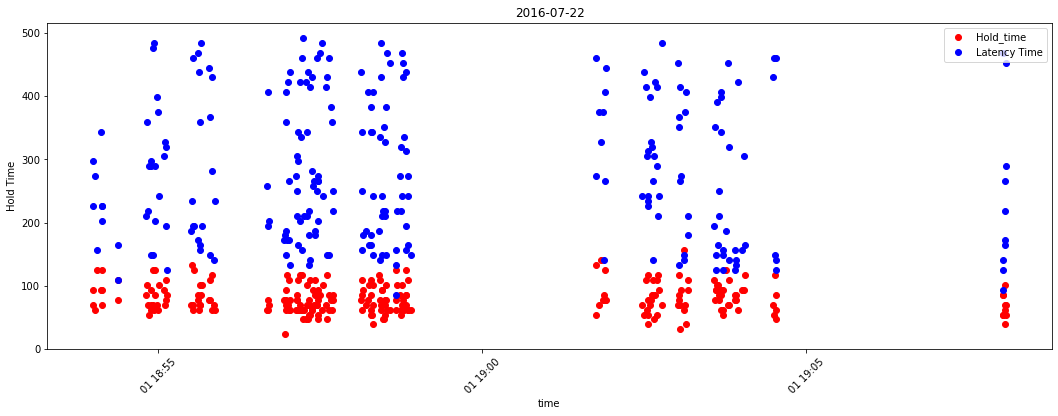

In [33]:


plt.figure(figsize=(18,6))

a=250;
b=500;

dates = df_daily_01_22["Timestamp"][a:b]
ht = df_daily_01_22["Hold_time"][a:b]
lt = df_daily_01_22["Latency_time"][a:b]
ft = df_daily_01_22["Flight_time"][a:b]

plt.plot(dates, ht,'ro', label="Hold_time")
plt.plot(dates,lt,'bo',label="Latency Time")
#plt.plot(dates,ft,'ko',label="Flight Time")

plt.title('2016-07-22')
plt.xlabel("time")
plt.ylabel("Hold Time")
plt.legend()
plt.xticks(rotation=45)

plt.show()

In [16]:
#fig, ax = plt.subplots(figsize=(15,7))

mean_ft=df_daily.groupby(['Date','Direction']).mean()['Flight_time']#.unstack()
mean_ft

Date        Direction
2016-07-22  LL           184.932398
            LR           191.918824
            LS           109.153333
            RL           346.023481
            RR           180.526337
                            ...    
2016-07-31  RR           211.237297
            RS           159.696789
            SL           245.950091
            SR           229.209350
            SS            78.100000
Name: Flight_time, Length: 73, dtype: float64

In [18]:
std_ft=df_daily.groupby(['Date','Direction']).std()['Flight_time']
std_ft

Date        Direction
2016-07-22  LL            96.046253
            LR            87.412246
            LS            58.594291
            RL            55.144543
            RR           115.157582
                            ...    
2016-07-31  RR           113.129038
            RS            92.571467
            SL            75.565905
            SR            88.494875
            SS             6.553311
Name: Flight_time, Length: 73, dtype: float64

<AxesSubplot:xlabel='Date,Direction'>

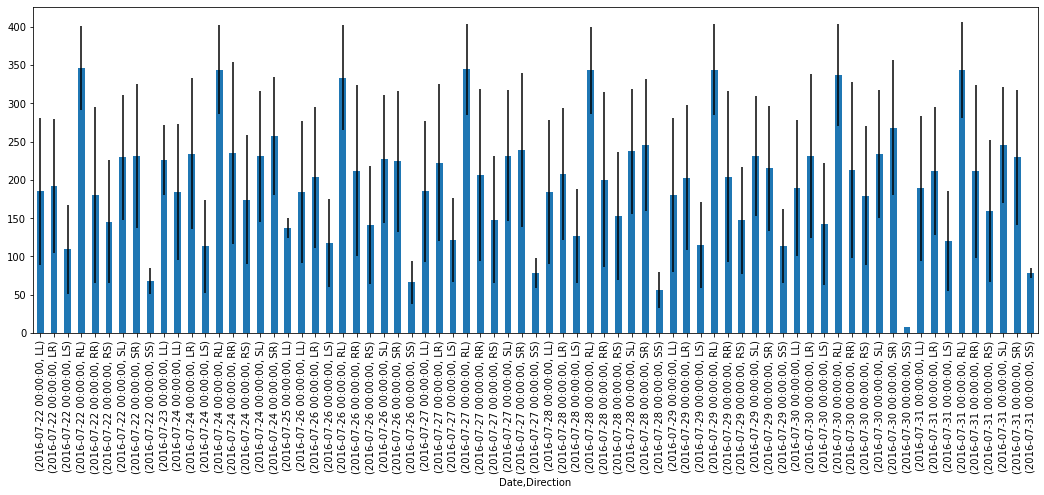

In [20]:
plt.figure(figsize=(18,6))

mean_ft.plot(kind='bar',yerr=std_ft)


In [21]:
mean_ft_01_22=df_daily_01_22.groupby(['Date','Direction']).mean()['Flight_time']#.unstack()
mean_ft_01_22



Date        Direction
2016-07-22  LL           184.932398
            LR           191.918824
            LS           109.153333
            RL           346.023481
            RR           180.526337
            RS           145.278448
            SL           229.641593
            SR           231.453571
            SS            67.970000
Name: Flight_time, dtype: float64

In [22]:
std_ft_01_22=df_daily_01_22.groupby(['Date','Direction']).std()['Flight_time']
std_ft_01_22

Date        Direction
2016-07-22  LL            96.046253
            LR            87.412246
            LS            58.594291
            RL            55.144543
            RR           115.157582
            RS            80.267336
            SL            81.629195
            SR            93.992539
            SS            17.282621
Name: Flight_time, dtype: float64

<AxesSubplot:xlabel='Date,Direction'>

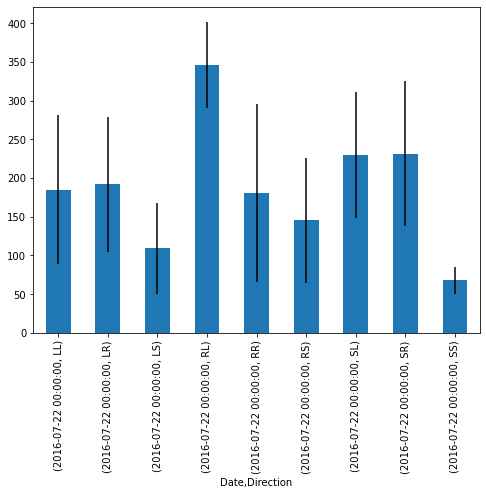

In [23]:
plt.figure(figsize=(8,6))

mean_ft_01_22.plot(kind='bar',yerr=std_ft_01_22)

In [24]:
mean_ht=df_daily.groupby(['Date','Direction']).mean()['Hold_time']#.unstack()
mean_ht

Date        Direction
2016-07-22  LL            80.794250
            LR            82.441176
            LS           113.296458
            RL            74.727348
            RR            77.286008
                            ...    
2016-07-31  RR            77.246672
            RS           114.114771
            SL            70.041576
            SR            76.356504
            SS            70.333333
Name: Hold_time, Length: 73, dtype: float64

In [25]:
std_ht=df_daily.groupby(['Date','Direction']).std()['Hold_time']#.unstack()
std_ht

Date        Direction
2016-07-22  LL           14.789731
            LR           12.100524
            LS           15.605182
            RL           13.032431
            RR           23.560441
                           ...    
2016-07-31  RR           32.193676
            RS           21.375021
            SL           13.569359
            SR           16.645890
            SS           17.386066
Name: Hold_time, Length: 73, dtype: float64

In [26]:
mean_lt=df_daily.groupby(['Date','Direction']).mean()['Latency_time']#.unstack()
mean_lt

Date        Direction
2016-07-22  LL           263.221318
            LR           261.589412
            LS           194.017083
            RL           421.386464
            RR           249.152675
                            ...    
2016-07-31  RR           278.616153
            RS           239.163486
            SL           361.370471
            SR           341.263415
            SS           130.200000
Name: Latency_time, Length: 73, dtype: float64

In [27]:
std_lt=df_daily.groupby(['Date','Direction']).std()['Latency_time']#.unstack()
std_lt

Date        Direction
2016-07-22  LL            98.575564
            LR            86.510129
            LS            58.838601
            RL            53.234442
            RR           116.915061
                            ...    
2016-07-31  RR           118.385312
            RS            91.680648
            SL            76.129721
            SR            88.051541
            SS             3.783556
Name: Latency_time, Length: 73, dtype: float64